### Introduction

In [ ]:
import tensorflow.keras.datasets.mnist as mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train / 255.0   # rescale the images to be between 0 and 1
x_test = x_test / 255.0     # rescale the images to be between 0 and 1

11490434/11490434 [==============================] - 0s 0us/step


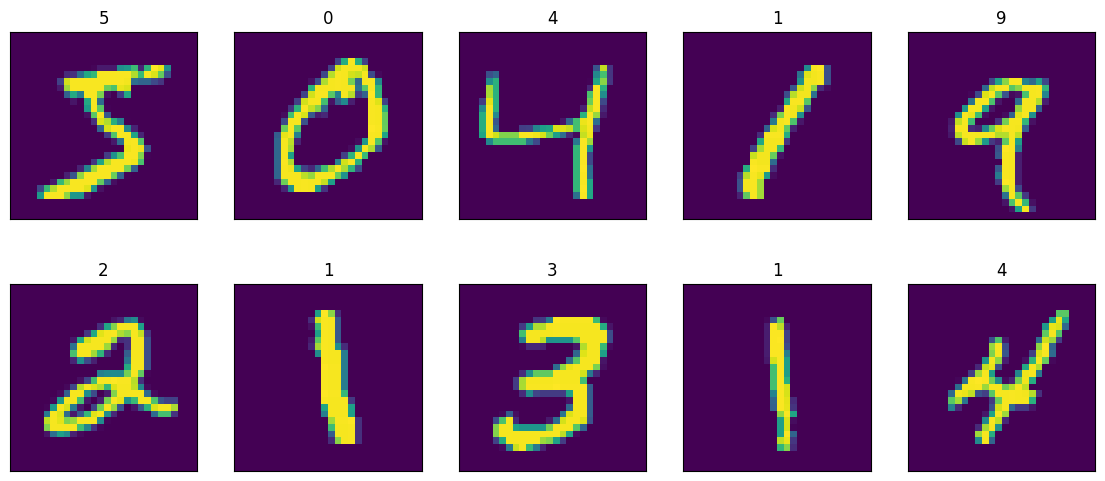

In [ ]:
# show first 10 training images and their category labels
import matplotlib.pyplot as plt

plt.figure(figsize=(14,6))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_train[i])
    plt.xticks([])
    plt.yticks([])
    plt.title('%d' % y_train[i])
plt.show()

In [ ]:
# manually convert y values from integers to vectors
import numpy as np

y_train_target = np.eye(10)[y_train]
y_test_target = np.eye(10)[y_test]
print('original target:', y_train[0])
print('  vector target:', y_train_target[0])

original target: 5
  vector target: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [ ]:
import tensorflow as tf

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),   # input is a 28x28 image
  tf.keras.layers.Dense(32, activation='relu'),    # 32 neurons in the middle "hidden" layer
  tf.keras.layers.Dense(10, activation='relu')     # 10 outputs (one for each category)
])

# define what we want to minimize (the thing that we take the derivative of to get the weight changes)
def my_loss(y_true, y_predict):
    return (y_true-y_predict)**2

model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.1), # use stochastic gradient descent
              loss=my_loss,
              metrics=['accuracy']  # in addition to the loss, also compute the categorization accuracy
             )

In [ ]:
loss, accuracy = model.evaluate(x_test,  y_test_target) # bad accuracy because no training

313/313 [==============================] - 2s 4ms/step - loss: 0.1107 - accuracy: 0.1152


313/313 [==============================] - 1s 1ms/step


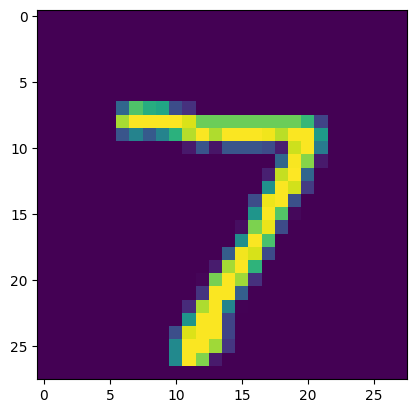

actual output from network: [0.         0.         0.         0.         0.5306048  0.09802014
 0.10052172 0.13359678 0.         0.08953515]
category (the largest output): 4


In [ ]:
# examining output
output = model.predict(x_test)
category = np.argmax(output, axis=1) # instance is classified as the class with the greatest probability

plt.imshow(x_test[0])
plt.show()
print('actual output from network:', output[0])
print('category (the largest output):', category[0])

In [ ]:
# train model for 5 epochs + evaluate on test set in each epoch
model.fit(x_train, y_train_target, epochs=5, validation_data=(x_test, y_test_target));

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0348 - accuracy: 0.7810 - val_loss: 0.0261 - val_accuracy: 0.8394
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0251 - accuracy: 0.8432 - val_loss: 0.0233 - val_accuracy: 0.8531
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0229 - accuracy: 0.8539 - val_loss: 0.0218 - val_accuracy: 0.8599
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0216 - accuracy: 0.8590 - val_loss: 0.0209 - val_accuracy: 0.8640
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0206 - accuracy: 0.8630 - val_loss: 0.0202 - val_accuracy: 0.8668


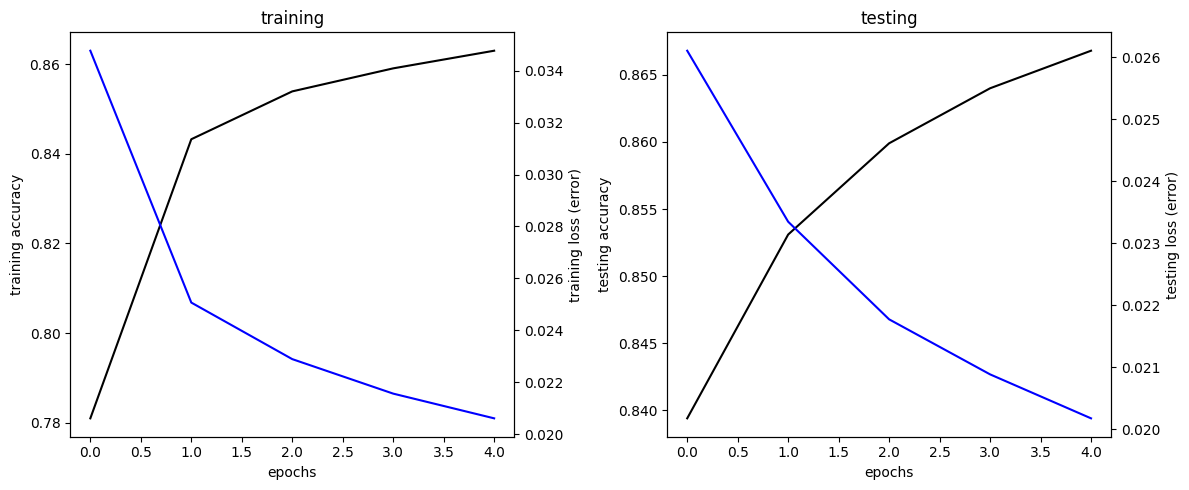

In [ ]:
# plot categorization accuracy and error over time for training and test set
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
plt.plot(model.history.history['accuracy'], c='k')
plt.ylabel('training accuracy')
plt.xlabel('epochs')
plt.twinx()
plt.plot(model.history.history['loss'], c='b')
plt.ylabel('training loss (error)')
plt.title('training')

plt.subplot(1, 2, 2)
plt.plot(model.history.history['val_accuracy'], c='k')
plt.ylabel('testing accuracy')
plt.xlabel('epochs')
plt.twinx()
plt.plot(model.history.history['val_loss'], c='b')
plt.ylabel('testing loss (error)')
plt.title('testing')
plt.tight_layout()
plt.show()

313/313 [==============================] - 0s 1ms/step


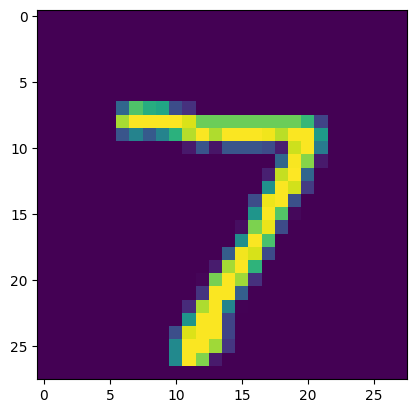

actual output from network: [0.         0.         0.         0.00944065 0.         0.
 0.         0.9416262  0.         0.        ]
category (the largest output): 7


In [ ]:
# examining output after training
output = model.predict(x_test)
category = np.argmax(output, axis=1)

plt.imshow(x_test[0])
plt.show()
print('actual output from network:', output[0])
print('category (the largest output):', category[0])

In [ ]:
# generate confusion matrix
confusion=np.zeros((10,10), dtype=int)
np.add.at(confusion, (category, y_test), 1)
print(confusion)

[[ 964    0    8    3    1  387   18    5   11   12]
 [   0 1118    0    0    0   11    3    9    3    8]
 [   2    2  964   16    4   13    1   20    7    0]
 [   1    2    6  968    1  163    1   10   16   15]
 [   0    0   12    1  928   43    8    3    8   22]
 [   0    0    0    0    0    0    0    0    0    0]
 [   8    4   12    1   11   43  923    0   11    2]
 [   2    1   13    7    3   47    1  962    8    8]
 [   3    8   17   13    4  155    3    1  905    6]
 [   0    0    0    1   30   30    0   18    5  936]]


### Question 1



In [ ]:
# loss function to be used for each model
def my_loss(y_true, y_predict):
    return (y_true-y_predict)**2

models = {} # empty dict for storing 10 models
for i in range(10):
  # instantiate new model
  model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),   # input is a 28x28 image
    tf.keras.layers.Dense(32, activation='relu'),    # 32 neurons in the middle "hidden" layer
    tf.keras.layers.Dense(10, activation='relu')     # 10 outputs (one for each category)
  ])
  model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.1), # use stochastic gradient descent
                loss=my_loss,
                metrics=['accuracy']  # in addition to the loss, also compute the categorization accuracy
                )
  # add to dict
  models[str(i)] = model

# iterate through dict to train for 5 epochs
accuracy = []
for key, model in models.items():
  print('\n')
  print(f'Model {key}:')
  model.fit(x_train, y_train_target, epochs=5, validation_data=(x_test, y_test_target));
  # append training accuracy vs. epoch lists for each model
  accuracy.append(model.history.history['accuracy'])

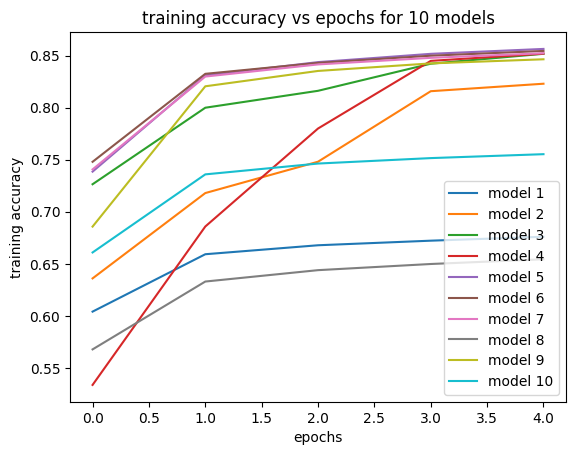

In [ ]:
# plot each model's accuracy
for model_idx, model_acc in enumerate(accuracy):
    plt.plot(model_acc, label=f'model {model_idx + 1}')

# add labels and legend
plt.xlabel('epochs')
plt.ylabel('training accuracy')
plt.title('training accuracy vs epochs for 10 models')
plt.legend()
plt.show()

The behaviour of the model changes with each iteration because of the random initialization of weights, and the random nature of optimization using SGD. Variability is also added by using batches, where the training data is shuffled on each epoch, thus shuffing local minima as well.

### Question 2

In [ ]:
# loss function to be used for each model
def my_loss(y_true, y_predict):
    return (y_true-y_predict)**2

models = {} # empty dict for storing 10 models
for i in range(10):
  # instantiate new model
  model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),   # input is a 28x28 image
    tf.keras.layers.Dense(32, activation='relu'),    # 32 neurons in the middle "hidden" layer
    tf.keras.layers.Dense(10, activation='relu')     # 10 outputs (one for each category)
  ])
  model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.1), # use stochastic gradient descent
                loss=my_loss,
                metrics=['accuracy']  # in addition to the loss, also compute the categorization accuracy
                )
  # add to dict
  models[str(i)] = model

# iterate through dict to train for 20 epochs
training_loss = []
testing_loss = []
for key, model in models.items():
  print('\n')
  print(f'Model {key}:')
  model.fit(x_train, y_train_target, epochs=20, validation_data=(x_test, y_test_target));
  # append training and testing loss vs. epoch lists for each model
  training_loss.append(model.history.history['loss'])
  testing_loss.append(model.history.history['val_loss'])

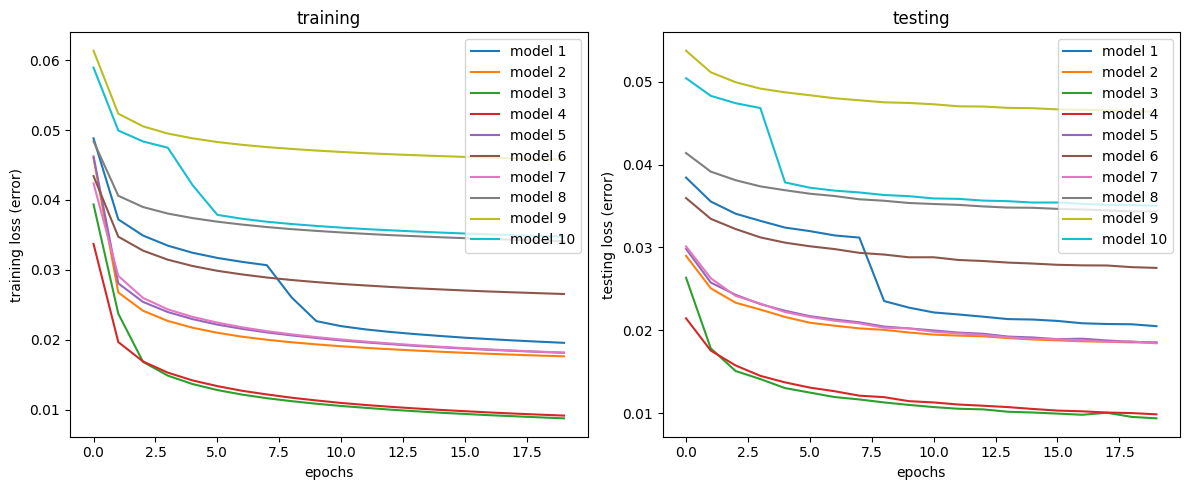

In [ ]:
# plot each model's training loss
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
for model_idx, loss in enumerate(training_loss):
    plt.plot(loss, label=f'model {model_idx + 1}')

# add labels and legend
plt.xlabel('epochs')
plt.ylabel('training loss (error)')
plt.title('training')
plt.legend()

# plot each model's testing loss
plt.subplot(1, 2, 2)
for model_idx, loss in enumerate(testing_loss):
    plt.plot(loss, label=f'model {model_idx + 1}')

# add labels and legend
plt.xlabel('epochs')
plt.ylabel('testing loss (error)')
plt.title('testing')
plt.legend()

plt.tight_layout()
plt.show()

With 20 epochs, we can see that each model has already converged in less than 10 epochs, and the loss continues to decay, but marginally. The models don't converge to the same value, but they are all equally stable.

### Question 3

In [ ]:
# loss function to be used for each model
def my_loss(y_true, y_predict):
    return (y_true-y_predict)**2

models = {} # empty dict for storing 10 models
for i in range(10):
  # instantiate new model
  model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),   # input is a 28x28 image
    tf.keras.layers.Dense(32, activation='relu'),    # 32 neurons in the middle "hidden" layer
    tf.keras.layers.Dense(10, activation='relu')     # 10 outputs (one for each category)
  ])
  model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01), # use stochastic gradient descent
                loss=my_loss,
                metrics=['accuracy']  # in addition to the loss, also compute the categorization accuracy
                )
  # add to dict
  models[str(i)] = model

# iterate through dict to train for 20 epochs
training_loss = []
testing_loss = []
for key, model in models.items():
  print('\n')
  print(f'Model {key}:')
  model.fit(x_train, y_train_target, epochs=20, validation_data=(x_test, y_test_target));
  # append training and testing loss vs. epoch lists for each model
  training_loss.append(model.history.history['loss'])
  testing_loss.append(model.history.history['val_loss'])

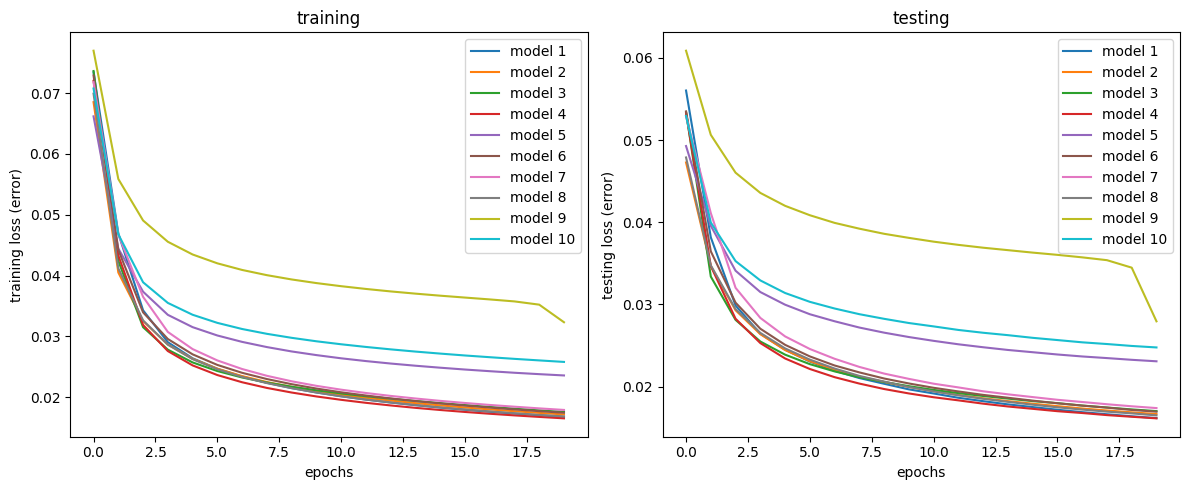

In [ ]:
# plot each model's training loss
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
for model_idx, loss in enumerate(training_loss):
    plt.plot(loss, label=f'model {model_idx + 1}')

# add labels and legend
plt.xlabel('epochs')
plt.ylabel('training loss (error)')
plt.title('training')
plt.legend()

# plot each model's testing loss
plt.subplot(1, 2, 2)
for model_idx, loss in enumerate(testing_loss):
    plt.plot(loss, label=f'model {model_idx + 1}')

# add labels and legend
plt.xlabel('epochs')
plt.ylabel('testing loss (error)')
plt.title('testing')
plt.legend()

plt.tight_layout()
plt.show()

Lowering the learning rate to 0.01 significantly improves all models. They all converge to a lower loss value, meaning they found similar solutions. By reducing the learning rate, the algorithm takes smaller steps, allowing it to more precisely navigate the loss landscape and converge to a more consistent and lower loss across different model runs.

### Question 4

In [ ]:
# loss function to be used for each model
def my_loss(y_true, y_predict):
    return (y_true-y_predict)**2

models = {} # empty dict for storing 10 models
for i in range(10):
  # instantiate new model
  model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),   # input is a 28x28 image
    tf.keras.layers.Dense(32, activation='relu'),    # 32 neurons in the middle "hidden" layer
    tf.keras.layers.Dense(10, activation='relu')     # 10 outputs (one for each category)
  ])
  model.compile(optimizer="adam", # use Adam
                loss=my_loss,
                metrics=['accuracy']  # in addition to the loss, also compute the categorization accuracy
                )
  # add to dict
  models[str(i)] = model

# iterate through dict to train for 20 epochs
training_loss = []
testing_loss = []
for key, model in models.items():
  print('\n')
  print(f'Model {key}:')
  model.fit(x_train, y_train_target, epochs=20, validation_data=(x_test, y_test_target));
  # append training and testing loss vs. epoch lists for each model
  training_loss.append(model.history.history['loss'])
  testing_loss.append(model.history.history['val_loss'])

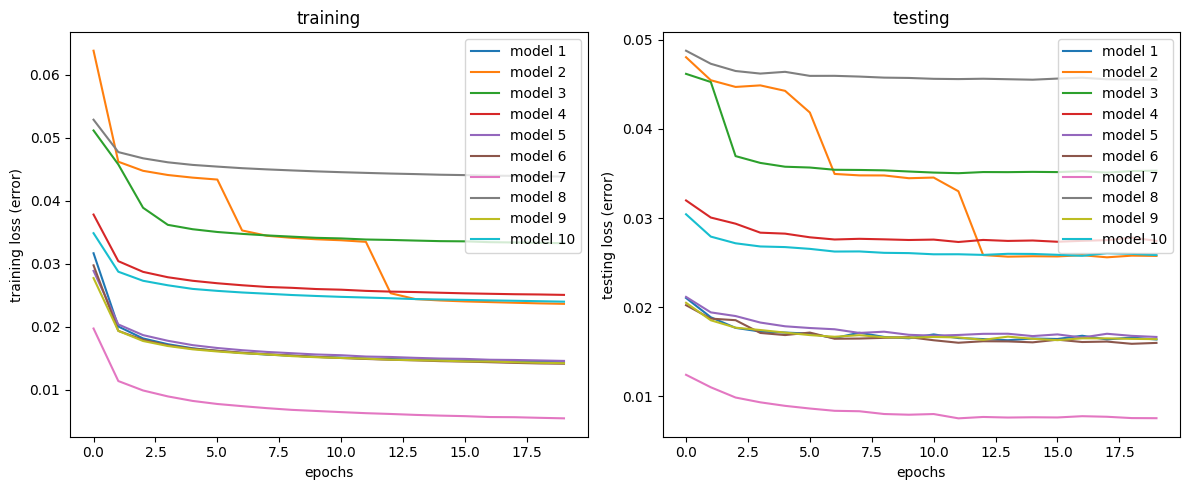

In [ ]:
# plot each model's training loss
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
for model_idx, loss in enumerate(training_loss):
    plt.plot(loss, label=f'model {model_idx + 1}')

# add labels and legend
plt.xlabel('epochs')
plt.ylabel('training loss (error)')
plt.title('training')
plt.legend()

# plot each model's testing loss
plt.subplot(1, 2, 2)
for model_idx, loss in enumerate(testing_loss):
    plt.plot(loss, label=f'model {model_idx + 1}')

# add labels and legend
plt.xlabel('epochs')
plt.ylabel('testing loss (error)')
plt.title('testing')
plt.legend()

plt.tight_layout()
plt.show()

Comparing the plots of Adam to SGD, we can see that the Adam models converge faster and generally achieve better accuracy. This is because Adam's adaptive learning rate mechanism allows it to handle different parameter scales and adapt to the changing dynamics of the optimization landscape, which can result in more efficient training.

### Question 5

In [ ]:
models = {} # empty dict for storing 10 models
for i in range(10):
  # instantiate new model
  model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),   # input is a 28x28 image
    tf.keras.layers.Dense(32, activation='relu'),    # 32 neurons in the middle "hidden" layer
    tf.keras.layers.Dense(10, activation='softmax')  # 10 outputs (one for each category)
  ])
  model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy']  # in addition to the loss, also compute the categorization accuracy
                )
  # add to dict
  models[str(i)] = model

# iterate through dict to train for 20 epochs
training_loss = []
testing_loss = []
for key, model in models.items():
  print('\n')
  print(f'Model {key}:')
  model.fit(x_train, y_train, epochs=20, validation_data=(x_test, y_test))   # note that we now use y_train, not y_train_target
  # append training and testing loss vs. epoch lists for each model
  training_loss.append(model.history.history['loss'])
  testing_loss.append(model.history.history['val_loss'])

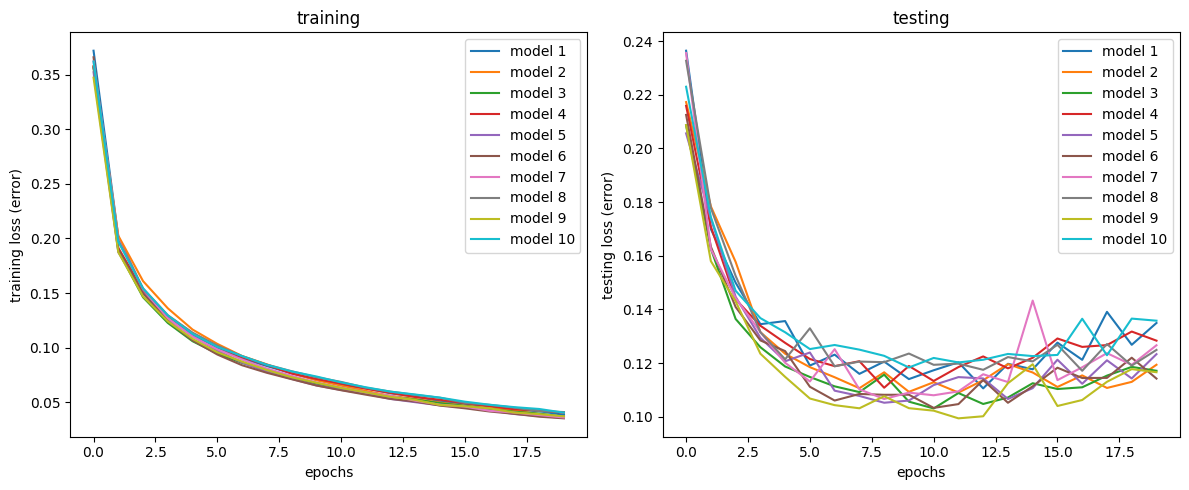

In [ ]:
# plot each model's training loss
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
for model_idx, loss in enumerate(training_loss):
    plt.plot(loss, label=f'model {model_idx + 1}')

# add labels and legend
plt.xlabel('epochs')
plt.ylabel('training loss (error)')
plt.title('training')
plt.legend()

# plot each model's testing loss
plt.subplot(1, 2, 2)
for model_idx, loss in enumerate(testing_loss):
    plt.plot(loss, label=f'model {model_idx + 1}')

# add labels and legend
plt.xlabel('epochs')
plt.ylabel('testing loss (error)')
plt.title('testing')
plt.legend()

plt.tight_layout()
plt.show()

With the use of softmax for the output layer activation function, the model behaviour in training becomes almost uniform across models - converging to the same solution region at almost the same rates. This is because the softmax function normalizes the output probabilities, encouraging consistent convergence to a shared solution region. However, during testing, oscillations and slightly higher loss are observed, potentially due to the model's sensitivity to input variations or complexities in the data that were not fully captured during training. However, the behaviours are still consistent across models.

### Question 6

In [ ]:
models = {} # empty dict for storing 8 neuron groups (dicts)
for i in range(8):
  models[str(2**(i+1))] = {} # empty dict for storing 10 models per neuron group
  for j in range(10):
    # instantiate new model
    model = tf.keras.models.Sequential([
      tf.keras.layers.Flatten(input_shape=(28, 28)),         # input is a 28x28 image
      tf.keras.layers.Dense(2**(i+1), activation='relu'),    # neurons in the middle "hidden" layer
      tf.keras.layers.Dense(10, activation='softmax')        # 10 outputs (one for each category)
    ])
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy']  # in addition to the loss, also compute the categorization accuracy
                  )
    # add to dict
    models[str(2**(i+1))][str(j)] = model

# iterate through neuron group and then through models to train each for 10 epochs
training_acc = []
testing_acc = []
for i, neuron_grp in models.items():
  neuron_training_acc = []
  neuron_testing_acc = []
  for j, model in neuron_grp.items():
    print('\n')
    print(f'Neurons={i}, Model {j}:')
    model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))   # note that we now use y_train, not y_train_target
    # append FINAL training and testing accuracy for each model
    neuron_training_acc.append(model.history.history['accuracy'][-1])
    neuron_testing_acc.append(model.history.history['val_accuracy'][-1])

  # append list of 10 final model accuracies for neuron group
  training_acc.append(neuron_training_acc)
  testing_acc.append(neuron_testing_acc)

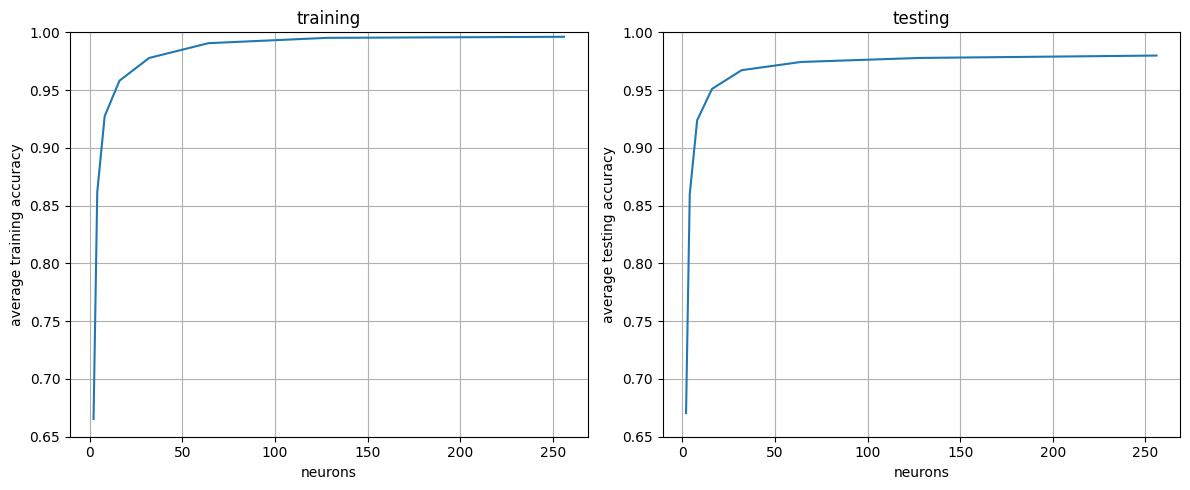

In [ ]:
# calculate average accuracies per neuron group
avg_training_acc = []
avg_testing_acc = []

for i in range(len(training_acc)):
    avg_training_acc.append(np.mean(training_acc[i]))
    avg_testing_acc.append(np.mean(testing_acc[i]))

neurons = []
for i in range(8):
  neurons.append(2**(i+1))

# plot each model's average training accuracy vs number of neurons
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
plt.plot(neurons, avg_training_acc)
plt.ylim(0.65, 1)
plt.grid(True)

# add labels and legend
plt.xlabel('neurons')
plt.ylabel('average training accuracy')
plt.title('training')

# plot each model's average training accuracy vs number of neurons
plt.subplot(1, 2, 2)
plt.plot(neurons, avg_testing_acc)
plt.ylim(0.65, 1)
plt.grid(True)

# add labels and legend
plt.xlabel('neurons')
plt.ylabel('average testing accuracy')
plt.title('testing')

plt.tight_layout()
plt.show()

Throughout both the training and testing phases, the model's average accuracy experiences a substantial increase from 2 to 32 neurons, showing signs of convergence within the range of 64 to 128 neurons. However, the improvement becomes marginal when transitioning from 128 to 256 neurons. This underscores the importance of augmenting neural network complexity up to a certain threshold, beyond which additional neurons cease to contribute significantly to performance gains.

### Question 7

Given the results from the above investigations, it seems that Adam + cross entropy loss + softmax in the output layer performs the best - the model converges quickly and most model iterations converge to a very low loss of 0.03 or less. To optimize, I would like to explore this model with different numbers of neurons as well as hidden layers.

In [ ]:
# no hidden layer

models = {} # empty dict for storing 10 models
for i in range(10):
  # instantiate new model
  model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),      # input is a 28x28 image
    tf.keras.layers.Dense(10, activation='softmax')     # 10 outputs (one for each category)
  ])
  model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy']  # in addition to the loss, also compute the categorization accuracy
                )
  # add to dict
  models[str(i)] = model

# iterate through dict to train for 20 epochs
testing_acc = []
for key, model in models.items():
  print('\n')
  print(f'Model {key}:')
  model.fit(x_train, y_train, epochs=20, validation_data=(x_test, y_test))   # note that we now use y_train, not y_train_target
  # append testing accuracy vs. epoch lists for each model
  testing_acc.append(model.history.history['val_accuracy'])

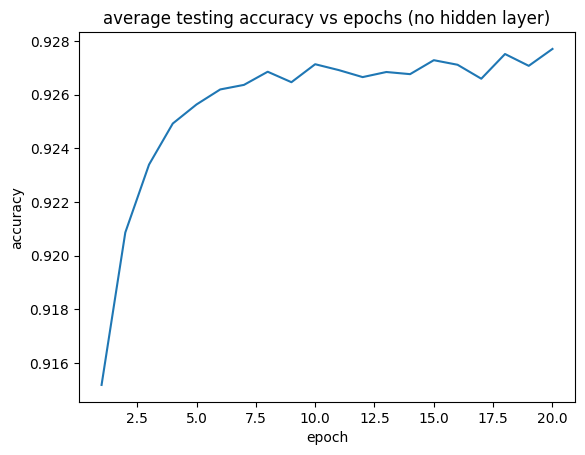

In [ ]:
# plot average testing accuracy vs. epoch
testing_acc_arr = np.array(testing_acc)

# calculate the mean along axis 0 (across models)
avg_testing_acc = np.mean(testing_acc_arr, axis=0)

# Plot the average accuracy vs. epoch
plt.plot(range(1, len(avg_testing_acc) + 1), avg_testing_acc)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('average testing accuracy vs epochs (no hidden layer)')
plt.show()

In [ ]:
# two hidden layers, second with varying number of neurons

models = {} # empty dict for storing 4 neuron groups (32, 64, 128, 256) for second hidden layer
for i in range(4, 8):
  models[str(2**(i+1))] = {} # empty dict for storing 5 models per neuron group
  for j in range(5):
    # instantiate new model
    model = tf.keras.models.Sequential([
      tf.keras.layers.Flatten(input_shape=(28, 28)),         # input is a 28x28 image
      tf.keras.layers.Dense(32, activation='relu'),          # first hidden layer
      tf.keras.layers.Dense(2**(i+1), activation='relu'),    # second hidden layer
      tf.keras.layers.Dense(10, activation='softmax')        # 10 outputs (one for each category)
    ])
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy']  # in addition to the loss, also compute the categorization accuracy
                  )
    # add to dict
    models[str(2**(i+1))][str(j)] = model

# iterate through neuron group and then through models to train each for 10 epochs
training_acc = []
testing_acc = []
for i, neuron_grp in models.items():
  neuron_training_acc = []
  neuron_testing_acc = []
  for j, model in neuron_grp.items():
    print('\n')
    print(f'Neurons={i}, Model {j}:')
    model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))   # note that we now use y_train, not y_train_target
    # append FINAL training and testing accuracy for each model
    neuron_training_acc.append(model.history.history['accuracy'][-1])
    neuron_testing_acc.append(model.history.history['val_accuracy'][-1])

  # append list of 10 final model accuracies for neuron group
  training_acc.append(neuron_training_acc)
  testing_acc.append(neuron_testing_acc)

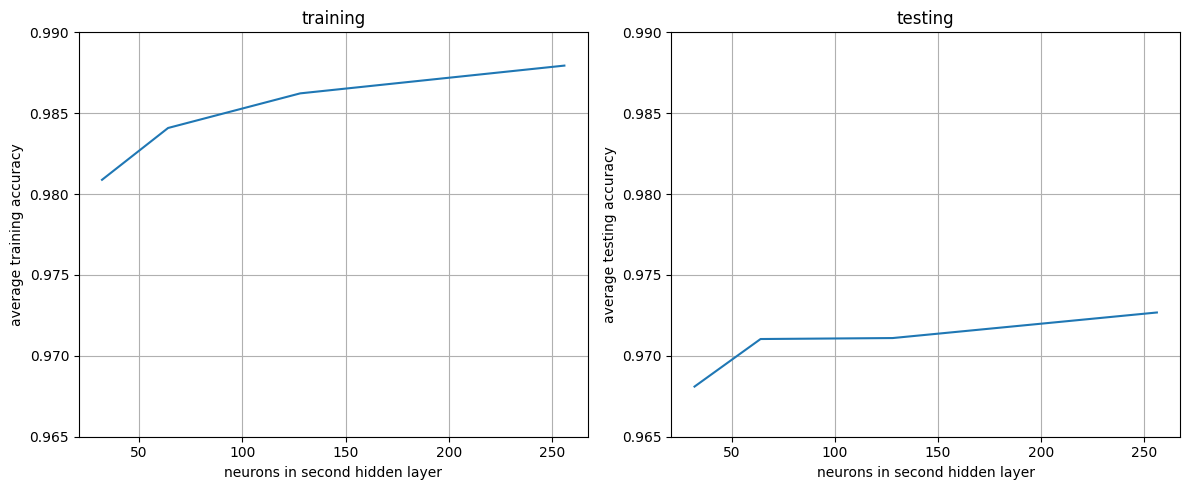

In [ ]:
# calculate average accuracies per neuron group
avg_training_acc = []
avg_testing_acc = []

for i in range(len(training_acc)):
    avg_training_acc.append(np.mean(training_acc[i]))
    avg_testing_acc.append(np.mean(testing_acc[i]))

neurons = []
for i in range(4, 8):
  neurons.append(2**(i+1))

# plot each model's average training accuracy vs number of neurons in second layer
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
plt.plot(neurons, avg_training_acc)
plt.ylim(0.965, 0.990)
plt.grid(True)

# add labels and legend
plt.xlabel('neurons in second hidden layer')
plt.ylabel('average training accuracy')
plt.title('training')

# plot each model's average training accuracy vs number of neurons
plt.subplot(1, 2, 2)
plt.plot(neurons, avg_testing_acc)
plt.ylim(0.965, 0.990)
plt.grid(True)

# add labels and legend
plt.xlabel('neurons in second hidden layer')
plt.ylabel('average testing accuracy')
plt.title('testing')

plt.tight_layout()
plt.show()

In [ ]:
# three hidden layers, second with varying number of neurons

models = {} # empty dict for storing 4 neuron groups (32, 64, 128, 256) for third hidden layer
for i in range(4, 8):
  models[str(2**(i+1))] = {} # empty dict for storing 5 models per neuron group
  for j in range(5):
    # instantiate new model
    model = tf.keras.models.Sequential([
      tf.keras.layers.Flatten(input_shape=(28, 28)),         # input is a 28x28 image
      tf.keras.layers.Dense(32, activation='relu'),          # first hidden layer
      tf.keras.layers.Dense(32, activation='relu'),          # second hidden layer
      tf.keras.layers.Dense(2**(i+1), activation='relu'),    # third hidden layer
      tf.keras.layers.Dense(10, activation='softmax')        # 10 outputs (one for each category)
    ])
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy']  # in addition to the loss, also compute the categorization accuracy
                  )
    # add to dict
    models[str(2**(i+1))][str(j)] = model

# iterate through neuron group and then through models to train each for 10 epochs
training_acc = []
testing_acc = []
for i, neuron_grp in models.items():
  neuron_training_acc = []
  neuron_testing_acc = []
  for j, model in neuron_grp.items():
    print('\n')
    print(f'Neurons={i}, Model {j}:')
    model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))   # note that we now use y_train, not y_train_target
    # append FINAL training and testing accuracy for each model
    neuron_training_acc.append(model.history.history['accuracy'][-1])
    neuron_testing_acc.append(model.history.history['val_accuracy'][-1])

  # append list of 10 final model accuracies for neuron group
  training_acc.append(neuron_training_acc)
  testing_acc.append(neuron_testing_acc)

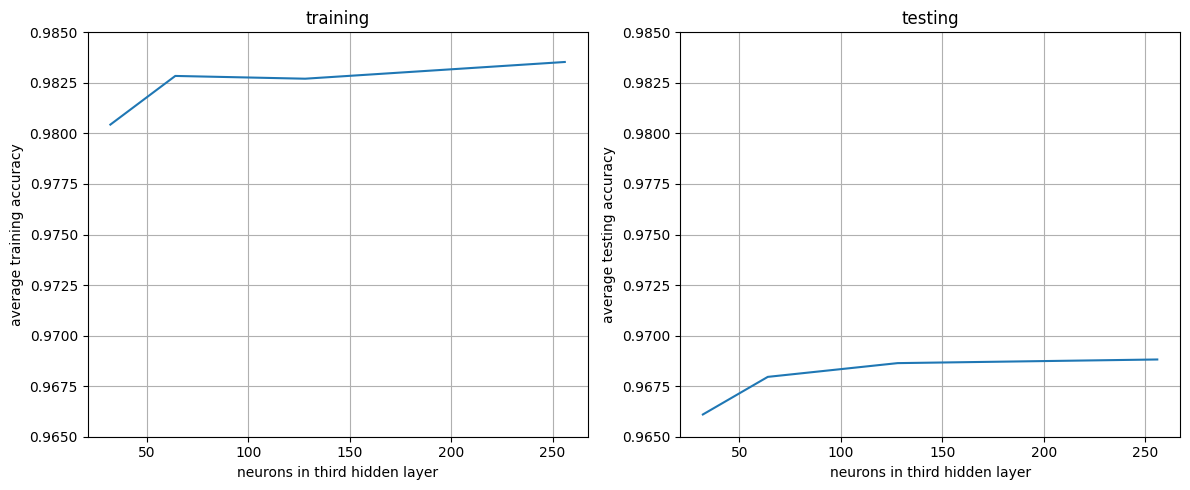

In [ ]:
# calculate average accuracies per neuron group
avg_training_acc = []
avg_testing_acc = []

for i in range(len(training_acc)):
    avg_training_acc.append(np.mean(training_acc[i]))
    avg_testing_acc.append(np.mean(testing_acc[i]))

neurons = []
for i in range(4, 8):
  neurons.append(2**(i+1))

# plot each model's average training accuracy vs number of neurons in second layer
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
plt.plot(neurons, avg_training_acc)
plt.ylim(0.965, 0.985)
plt.grid(True)

# add labels and legend
plt.xlabel('neurons in third hidden layer')
plt.ylabel('average training accuracy')
plt.title('training')

# plot each model's average training accuracy vs number of neurons
plt.subplot(1, 2, 2)
plt.plot(neurons, avg_testing_acc)
plt.ylim(0.965, 0.985)
plt.grid(True)

# add labels and legend
plt.xlabel('neurons in third hidden layer')
plt.ylabel('average testing accuracy')
plt.title('testing')

plt.tight_layout()
plt.show()

The model without a hidden layer exhibits respectable performance, with an initial testing accuracy surpassing 90% and reaching almost 93% by the 20th epoch. However, it does not converge within the given 20 epochs and displays oscillations. The models with 2 and 3 hidden layers show performance similar to the single hidden layer counterpart. To conserve computational resources, the plots begin at 32 neurons in the additional layers, maintaining a constant 32 neurons in subsequent layers. Interestingly, the testing accuracy appears to slightly decrease with each added hidden layer, hinting that the introduced complexity may not be essential for this task.